In [1]:
import cv2
import operator
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.signal import argrelextrema

In [2]:
print(sys.executable)
#Selecting top order frames
USE_TOP_ORDER = True
#Number of top sorted frames
NUM_TOP_FRAMES = 60

#Video path of the source file
videopath = "E:\J_tarp\sample1.mp4"
#Directory to store the processed frames
dir = "E:\J_tarp\Frames"
#smoothing window size
len_window = 13

c:\users\jhagan\appdata\local\programs\python\python38\python.exe


In [3]:
#Class to hold information about each frame
class Frame:
    def __init__(self, id, frame, value):
        self.id = id
        self.frame = frame
        self.value = value

    def __lt__(self, other):
        if self.id == other.id:
            return self.id < other.id
        return self.id < other.id

    def __gt__(self, other):
        return other.__lt__(self)

    def __eq__(self, other):
        return self.id == other.id and self.id == other.id

    def __ne__(self, other):
        return not self.__eq__(other)


def rel_change(a, b):
   x = (b - a) / max(a, b)
   print(x)
   return x


print("Video :" + videopath)
print("Frame Directory: " + dir)




Video :E:\J_tarp\sample1.mp4
Frame Directory: E:\J_tarp\Frames


In [4]:
cap = cv2.VideoCapture(str(videopath))


curr_frame = None
prev_frame = None

frame_diffs = []
frames = []
ret, frame = cap.read()
i = 1

while(ret):
    luv = cv2.cvtColor(frame, cv2.COLOR_BGR2LUV)
    curr_frame = luv
    if curr_frame is not None and prev_frame is not None:
        #logic here
        diff = cv2.absdiff(curr_frame, prev_frame)
        count = np.sum(diff)
        frame_diffs.append(count)
        frame = Frame(i, frame, count)
        frames.append(frame)
    prev_frame = curr_frame
    i = i + 1
    ret, frame = cap.read()
"""
    cv2.imshow('frame',luv)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
"""
cap.release()
#cv2.destroyAllWindows()

if USE_TOP_ORDER:
    # sort the list in descending order
    frames.sort(key=operator.attrgetter("value"), reverse=True)
    for keyframe in frames[:NUM_TOP_FRAMES]:
        name = "frame_" + str(keyframe.id) + ".jpg"
        cv2.imwrite(dir + "/" + name, keyframe.frame)

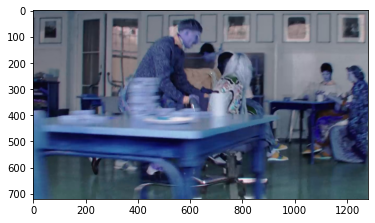

In [13]:
frame = cv2.imread(r"E:\J_tarp\Frames\frame_710.jpg")
plt.imshow(frame)

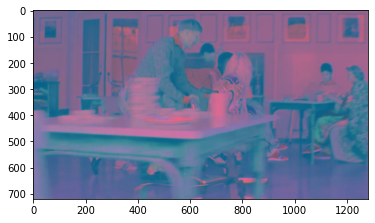

In [12]:
luv = cv2.cvtColor(frame, cv2.COLOR_BGR2LUV)
plt.imshow(luv)